In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings

In [6]:
df=pd.read_csv(r"C:\Users\viji\Downloads\framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [7]:
df.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [8]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
df.isnull().sum().sum()

645

In [10]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [11]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
#Data Cleaning
df.fillna(df.median(),inplace=True)
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

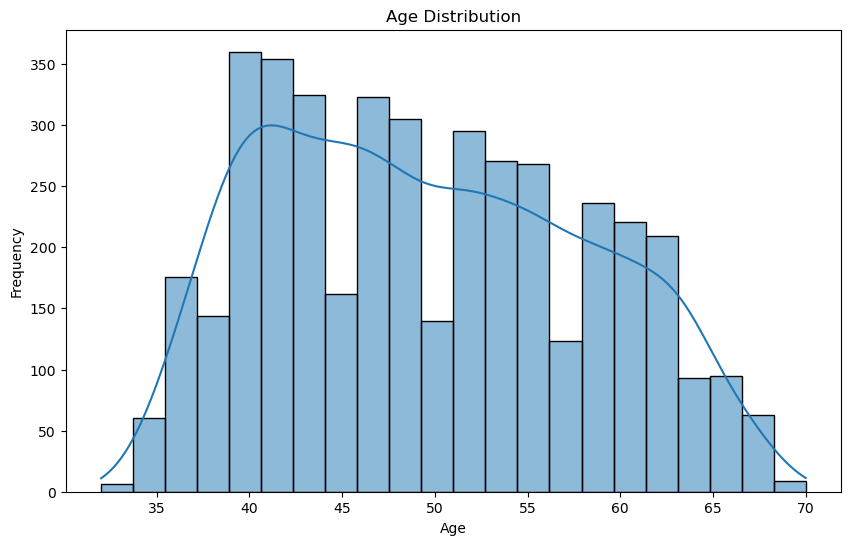

In [13]:
# Distribution of age
plt.figure(figsize=(10,6))
sns.histplot(df['age'],kde=True)
plt.title('Age Distribution')
# plt.xticks(bins)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

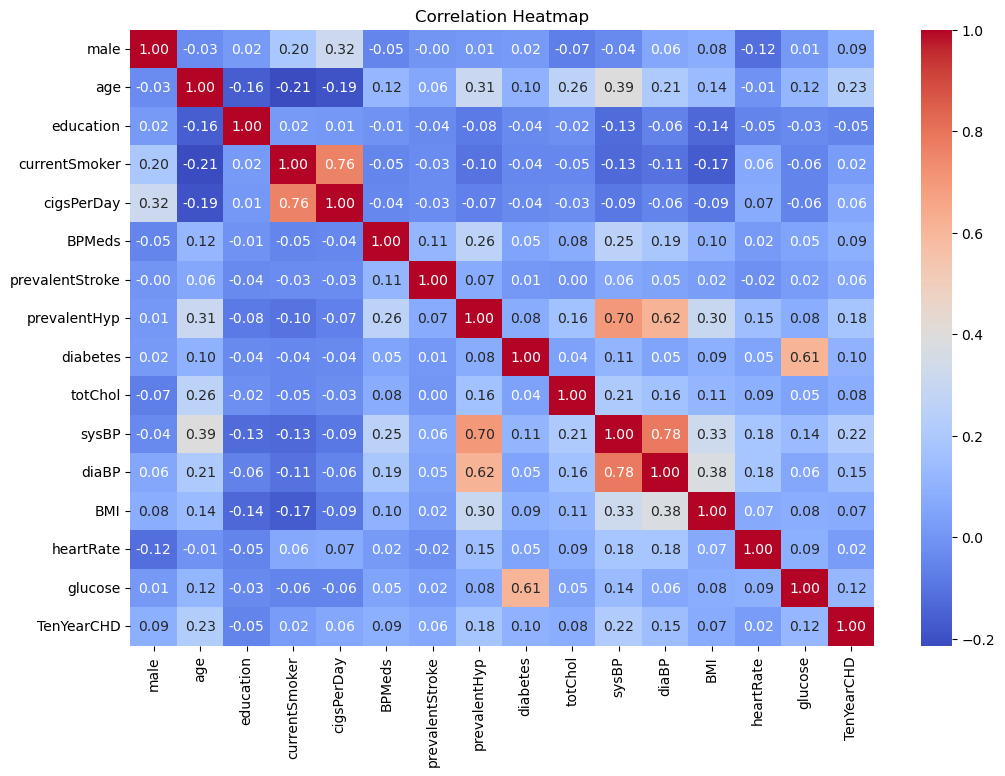

In [14]:
numeric_df=df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()                                  

In [16]:
X=df.drop('diabetes',axis=1)
Y=df['diabetes']

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [18]:
model=LogisticRegression(max_iter=500)
model.fit(X_train,Y_train)

C:\Users\viji\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [19]:
predictions=model.predict(X_test)

Evaluate the model

In [20]:
accuracy=accuracy_score(Y_test,predictions)
conf_matrix=confusion_matrix(Y_test,predictions)
class_report=classification_report(Y_test,predictions,output_dict=True)

In [21]:
# Converting the classification report into a DataFrame for easy plotting
report_df=pd.DataFrame(class_report).transpose()

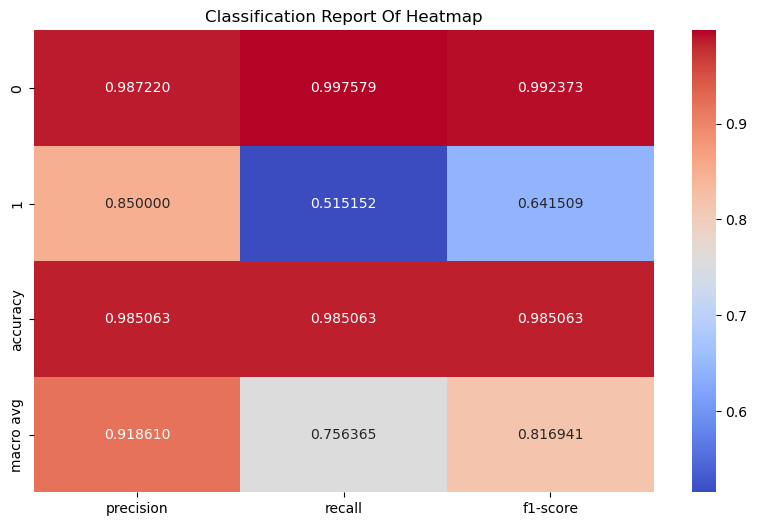

Accuracy: 0.985062893081761
comfusion matrix 
 [[1236    3]
 [  16   17]]


In [22]:
#plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(report_df.iloc[:-1, :-1],annot=True,cmap='coolwarm',fmt='2f') # Exclude support row and accuracy column
plt.title('Classification Report Of Heatmap')
plt.show()

# Print out accuracy and confusion matrix for reference
print("Accuracy:",accuracy)
print("comfusion matrix \n" ,conf_matrix)

# Credits

C:\Users\viji\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\viji\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


predicted class for new data point:0
predtiction probabilities:[[1.00000000e+00 1.33096465e-46]]


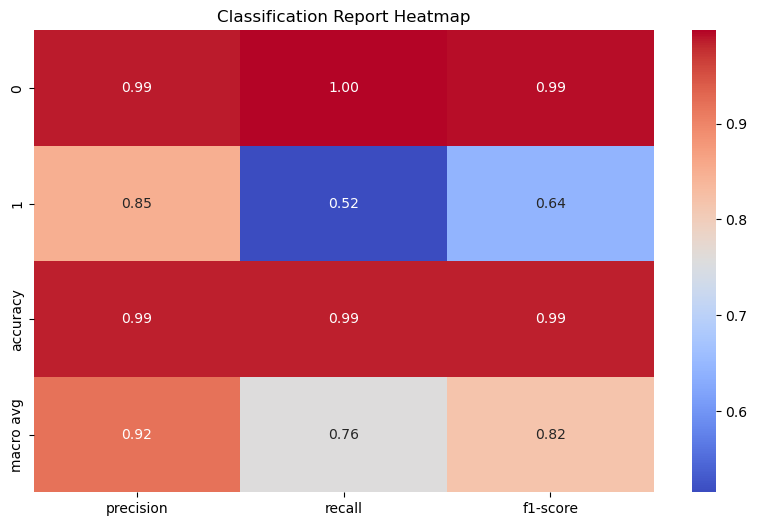

In [23]:
new_data_point=[10.5,65,130,0,125,0,85,1,250,0,1,60,0,1,0] # Example 15 values, replace with actual values
# Reshape new data point to 2D array since a single sample needs to be in that format
import numpy as np
new_data_point=np.array(new_data_point).reshape(1,-1)
# Predict the class for the new data point
new_prediction=model.predict(new_data_point)
new_prediction_proba=model.predict_proba(new_data_point)

print(f"predicted class for new data point:{new_prediction[0]}")
print(f"predtiction probabilities:{new_prediction_proba}")

# Plot the heatmap of the classification report (same as before)
plt.figure(figsize=(10,6))
sns.heatmap(report_df.iloc[:-1, :-1],annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()
           

Please input the 15 features for prediction (separate each value with Enter):
Enter feature 1: 2
Enter feature 2: 4
Enter feature 3: 6
Enter feature 4: 8
Enter feature 5: 10
Enter feature 6: 12
Enter feature 7: 14
Enter feature 8: 16
Enter feature 9: 18
Enter feature 10: 20
Enter feature 11: 24
Enter feature 12: 26
Enter feature 13: 28
Enter feature 14: 30
Enter feature 15: 32


C:\Users\viji\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\viji\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



Predicted class for the new data point: 0
Prediction probabilities: [[1.00000000e+00 1.43344147e-12]]


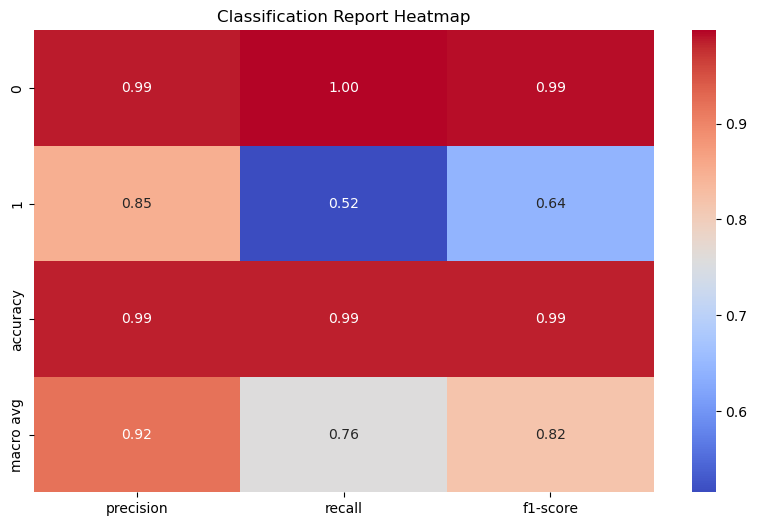

In [24]:
# Get the 15 features from the user
print("Please input the 15 features for prediction (separate each value with Enter):")
new_data_point = []
for i in range(1, 16):  # Loop for 15 features
    value = float(input(f"Enter feature {i}: "))
    new_data_point.append(value)

# Reshape new data point to 2D array since a single sample needs to be in that format
new_data_point = np.array(new_data_point).reshape(1, -1)

# Predict the class for the new data point
new_prediction = model.predict(new_data_point)
new_prediction_proba = model.predict_proba(new_data_point)

# Print predicted class and probabilities
print(f"\nPredicted class for the new data point: {new_prediction[0]}")
print(f"Prediction probabilities: {new_prediction_proba}")

# Plot the heatmap of the classification report (same as before)
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()
